In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 确认我们的电脑支持CUDA，然后显示CUDA信息：

print(device)

cuda:0


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifar-10-batches-py', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar-10-batches-py', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 bird truck truck  frog


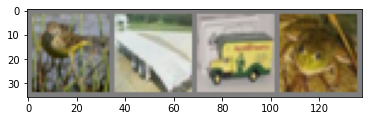

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 展示图像的函数


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 获取随机数据
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示图像
imshow(torchvision.utils.make_grid(images))
# 显示图像标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  # 多批次循环

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入
        inputs, labels = data

        # 梯度置0
        optimizer.zero_grad()

        # 正向传播，反向传播，优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印状态信息
        running_loss += loss.item()
        if i % 2000 == 1999:    # 每2000批次打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.157
[1,  4000] loss: 1.851
[1,  6000] loss: 1.698
[1,  8000] loss: 1.602
[1, 10000] loss: 1.511
[1, 12000] loss: 1.468
[2,  2000] loss: 1.392
[2,  4000] loss: 1.397
[2,  6000] loss: 1.344
[2,  8000] loss: 1.336
[2, 10000] loss: 1.311
[2, 12000] loss: 1.292
Finished Training


GroundTruth:    cat  ship  ship plane


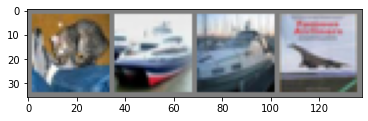

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car   car


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 68 %
Accuracy of  bird : 42 %
Accuracy of   cat : 33 %
Accuracy of  deer : 21 %
Accuracy of   dog : 47 %
Accuracy of  frog : 83 %
Accuracy of horse : 47 %
Accuracy of  ship : 26 %
Accuracy of truck : 76 %


In [ ]:
model = torchvision.models.resnet

#change blocknum (and input_size?)
class ResNet34(nn.Module):#224x224x3
    #实现主module:ResNet34
    def __init__(self, num_classes=1):
        super(ResNet34,self).__init__()
        self.pre = nn.Sequential(
                nn.Conv2d(3,64,7,stride=2,padding=3,bias=False),# (224+2*p-)/2(向下取整)+1，size减半->112
                nn.BatchNorm2d(64),#112x112x64
                nn.ReLU(inplace = True),
                nn.MaxPool2d(3,2,1)#kernel_size=3, stride=2, padding=1
                )#56x56x64
        
        #重复的layer,分别有3,4,6,3个residual block
        self.layer1 = self.make_layer(64,64,3)#56x56x64,layer1层输入输出一样，make_layer里，应该不用对shortcut进行处理，但是为了统一操作。。。
        self.layer2 = self.make_layer(64,128,4,stride=2)#第一个stride=2,剩下3个stride=1;28x28x128
        self.layer3 = self.make_layer(128,256,6,stride=2)#14x14x256
        self.layer4 = self.make_layer(256,512,3,stride=2)#7x7x512
        #分类用的全连接
        self.fc = nn.Linear(512,num_classes)
        
    def make_layer(self,in_ch,out_ch,block_num,stride=1):
        #当维度增加时，对shortcut进行option B的处理
        shortcut = nn.Sequential(#首个ResidualBlock需要进行option B处理
                nn.Conv2d(in_ch,out_ch,1,stride,bias=False),#1x1卷积用于增加维度；stride=2用于减半size；为简化不考虑偏差
                nn.BatchNorm2d(out_ch)
                )
        layers = []
        layers.append(ResidualBlock(in_ch,out_ch,stride,shortcut))
        
        for i in range(1,block_num):
            layers.append(ResidualBlock(out_ch,out_ch))#后面的几个ResidualBlock,shortcut直接相加
        return nn.Sequential(*layers)
        
    def forward(self,x):    #224x224x3
        x = self.pre(x)     #56x56x64
        x = self.layer1(x)  #56x56x64
        x = self.layer2(x)  #28x28x128
        x = self.layer3(x)  #14x14x256
        x = self.layer4(x)  #7x7x512
        x = F.avg_pool2d(x,7)#1x1x512
        x = x.view(x.size(0),-1)#将输出拉伸为一行：1x512
        x = self.fc(x)    #1x1
        # nn.BCELoss:二分类用的交叉熵，用的时候需要在该层前面加上 Sigmoid 函数

————————————————
版权声明：本文为CSDN博主「Ginkgo__」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/weixin_42135399/article/details/90371489